In [1]:
import skimage.io as skio
import skimage
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
import numpy as np
from bench_filter import Bench_Filter
from sklearn.model_selection import train_test_split
import random
import skimage.morphology as skm
from tools import *

In [2]:
from multiprocessing import cpu_count
cpus = cpu_count()
print(f'Number of CPU cores available : {cpus}')

Number of CPU cores available : 4


In [23]:
DATASET = ['Fluo-N2DL-HeLa','PhC-C2DH-U373']
idx = 1

IM_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/IMG_TRAIN/*.tif'))
TG_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/TARGET_TRAIN/*.tif'))

In [24]:
X_train, y_train = load_img_tg(IM_PATH, TG_PATH)
len(X_train)

184

In [25]:
X_train_cropped, y_train_cropped = crop_img_tg(X_train,y_train,4)

Initial dimensions of images : (520,696)
Patch dimensions : (130,174)


In [26]:
BF = Bench_Filter(n_estimators=20, cpus=cpus-1) #Leave 1 cpu to avoid computer crash
BF.add_identity()
BF.add_gaussian(np.sqrt(2)/2)
BF.add_gaussian(np.sqrt(2))
BF.add_gaussian(np.sqrt(2)*2) #Progression en sqrt(2)
BF.add_median(skm.disk(3))
BF.add_median()
BF.add_sobel()
BF.add_farid()
BF.add_prewitt()
BF.add_roberts()
BF.add_scharr()

In [27]:
BF.fit(X_train_cropped, y_train_cropped)

Applying filters to dataset: 184it [00:03, 49.25it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 20building tree 2 of 20
building tree 3 of 20

building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  6.7min finished


In [28]:
IM_TEST_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/IMG_TEST/*.tif'))
TG_TEST_PATH = sorted(glob.glob(f'data/{DATASET[idx]}/TARGET_TEST/*.tif'))

X_test, y_test = load_img_tg(IM_TEST_PATH, TG_TEST_PATH)

In [29]:
y_pred = BF.predict(X_test)

Applying filters to dataset: 46it [00:13,  3.41it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  1.2min finished


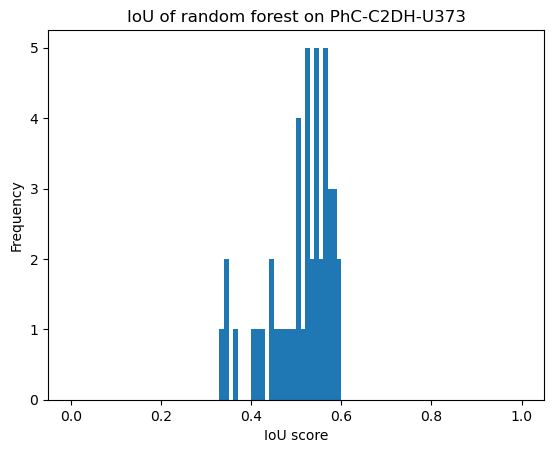

In [30]:
results = []
for i, pred in enumerate(y_pred):
    results.append(jaccard_score(y_test[i],pred,average='micro'))
plt.hist(results,bins=100,range=(0,1))
plt.title(f'IoU of random forest on {DATASET[idx]}')
plt.xlabel('IoU score')
plt.ylabel('Frequency')
plt.savefig(f'output/Naive_RF/rf_crop_performance_dataset_{idx}.png')

Applying filters to dataset: 1it [00:00,  3.03it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:    1.4s finished


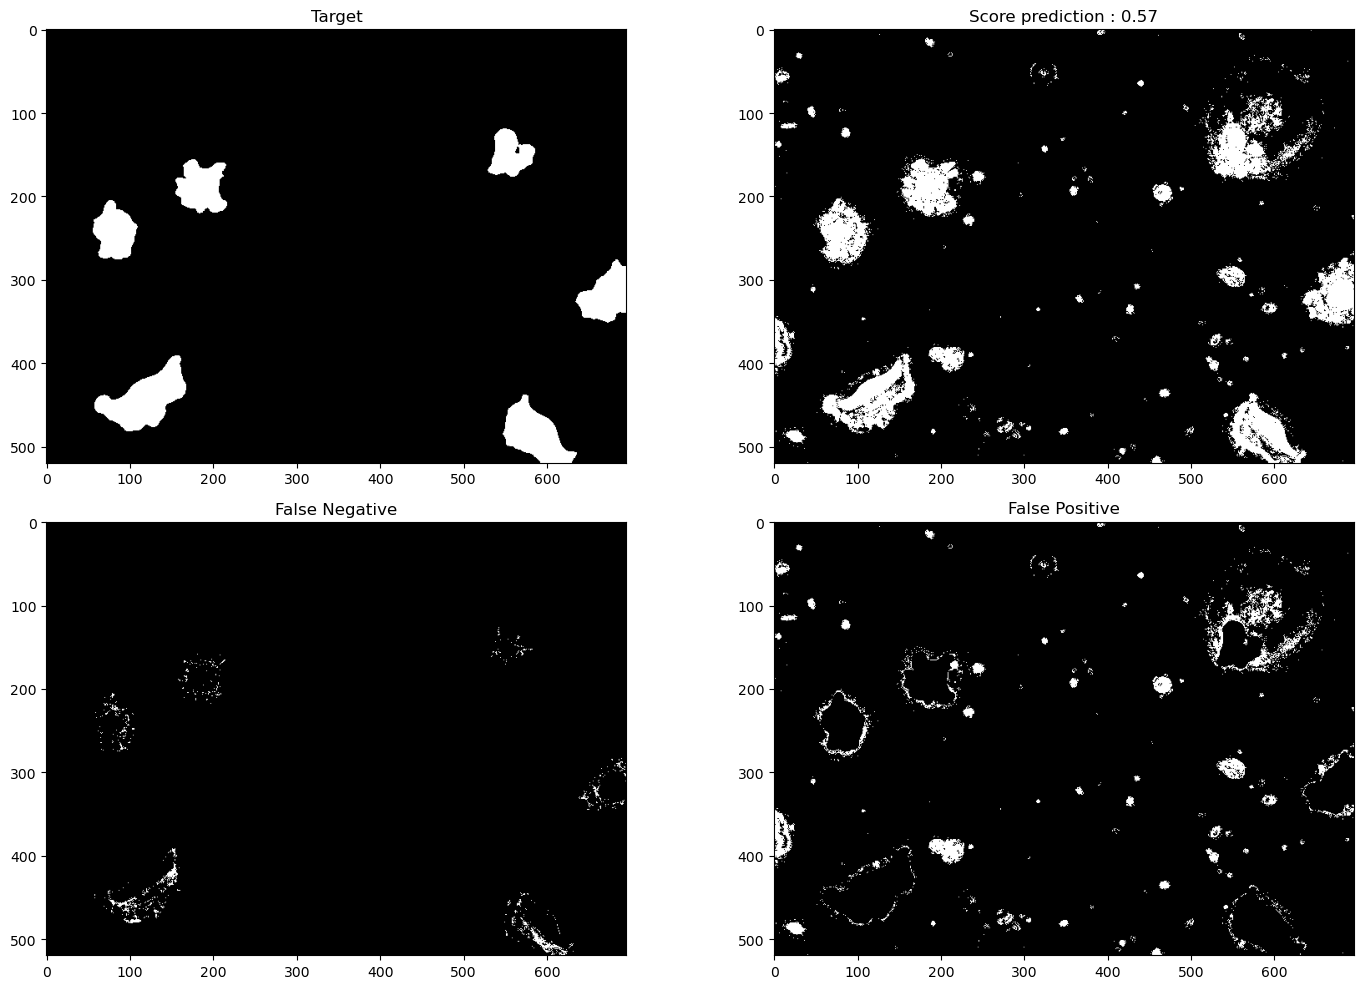

In [31]:
n_im = random.randrange(len(y_test))
target = y_test[n_im]
seg = skimage.img_as_bool(BF.predict([X_test[n_im]])[0])
score = jaccard_score(target,seg,average='micro')

fig = plot_pred_with_target(target,seg,score)
fig.savefig(f'output/Naive_RF/inference_rf_crop_dataset_{idx}.png')

Applying filters to dataset: 1it [00:00,  3.19it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s finished
Applying filters to dataset: 1it [00:00,  3.17it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s finished
Applying filters to dataset: 1it [00:00,  3.20it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   9 out of   9 | elapsed:    0.8s finished
Applying filters to dataset: 1it [00:00,  2.69it/s]
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: 

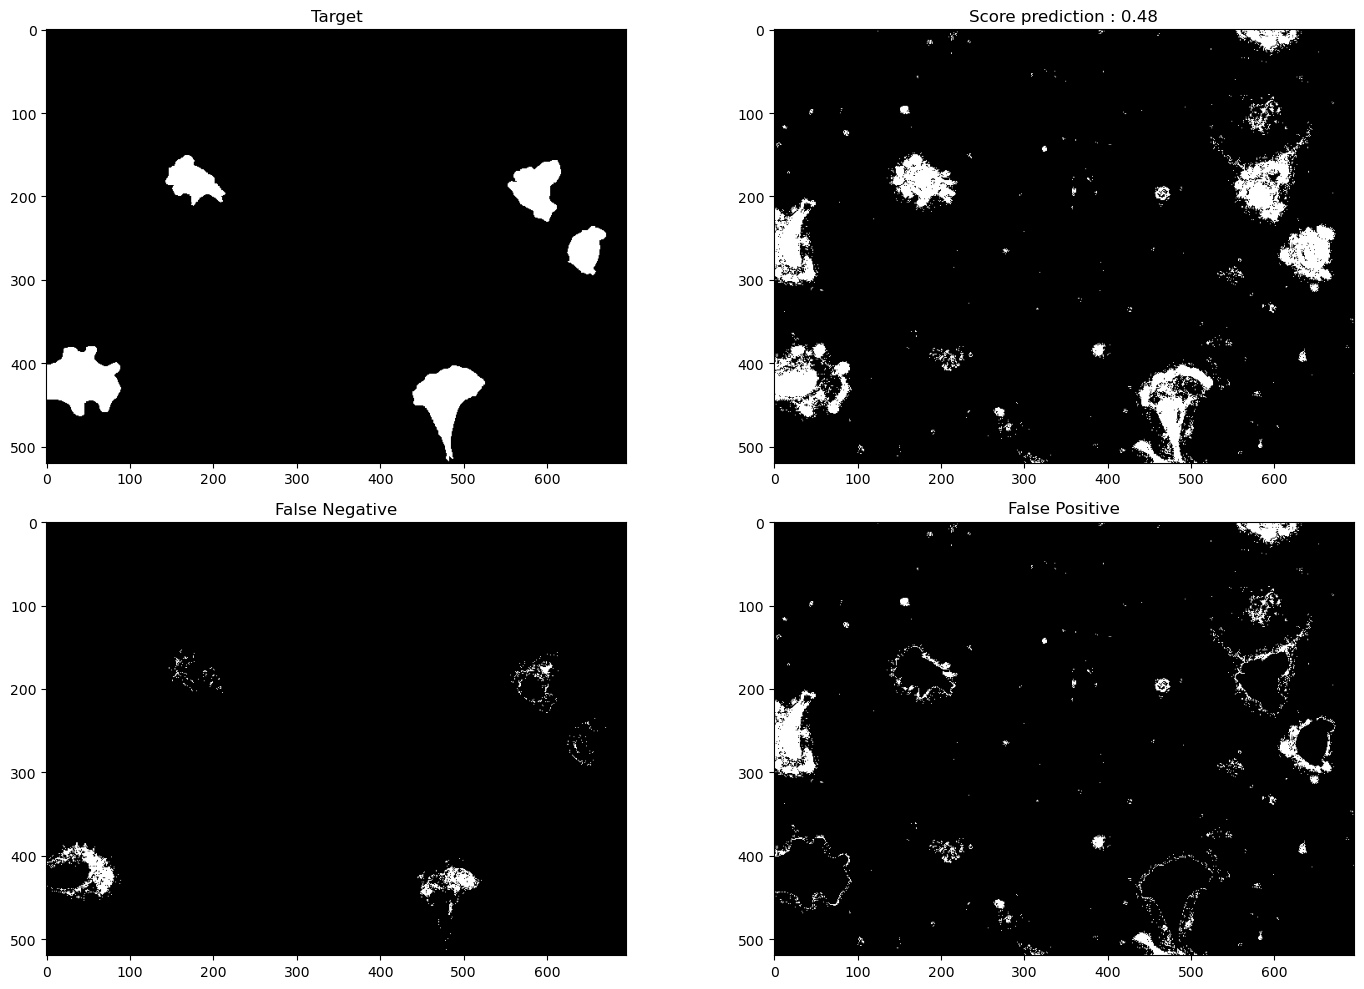

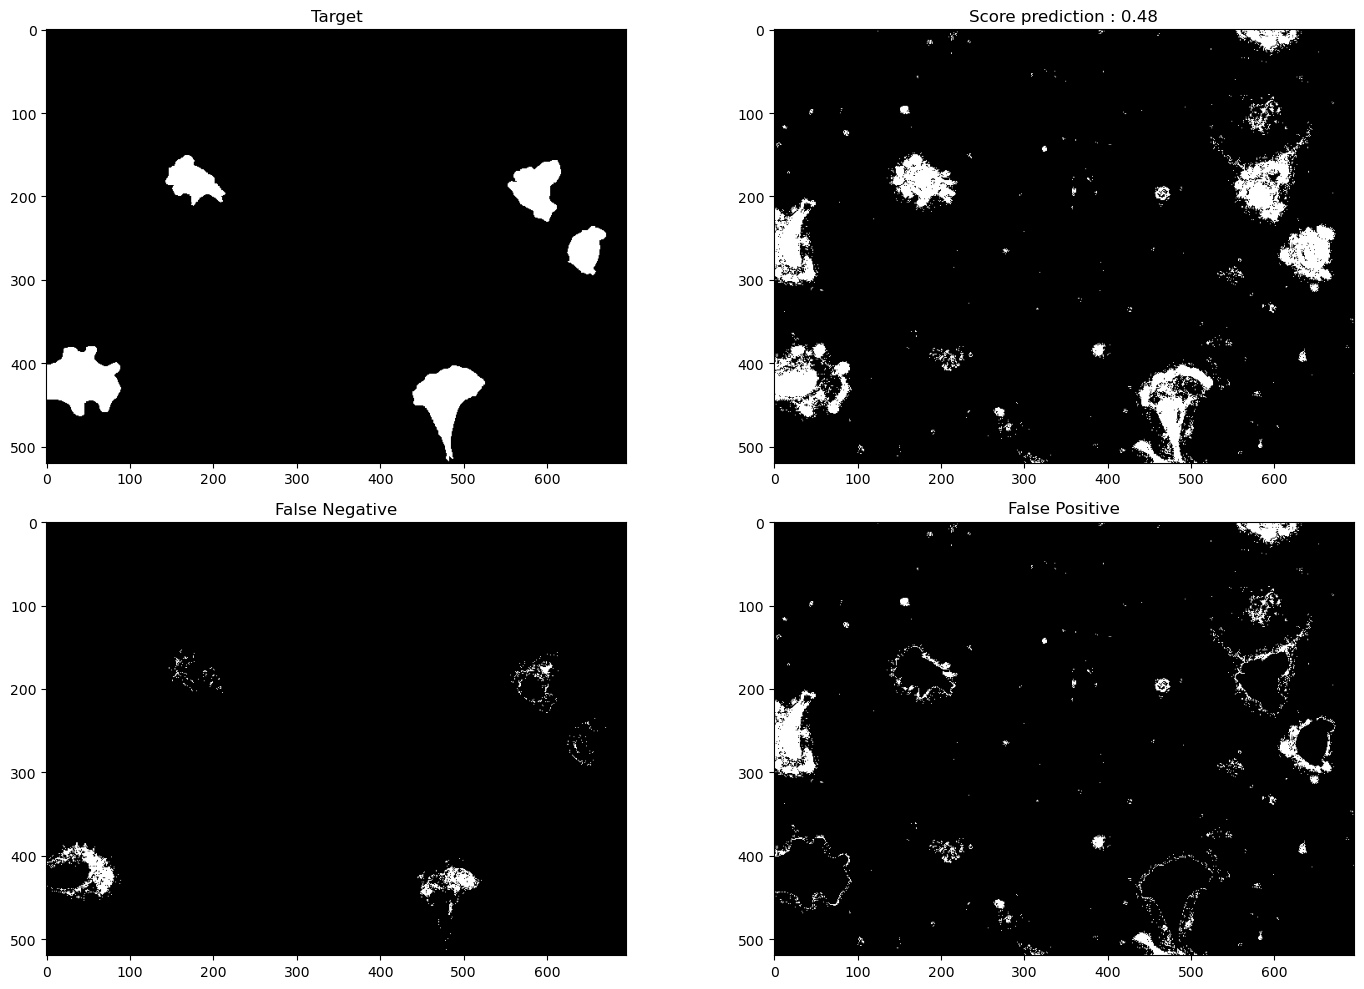

In [14]:
score = 1
n_im = 0
while score > 0.5 and n_im < len(y_test) :
    target = y_test[n_im]
    seg = skimage.img_as_bool(BF.predict([X_test[n_im]])[0])
    score = jaccard_score(target,seg,average='micro')
    n_im += 1
    
plot_pred_with_target(target,seg,score)
    